In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('hate_crime_data.csv')

In [29]:
df.head()

,state,income,seasonal_unemployment,share_metro_areas,share_hs_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,voted_trump,hate_crimes_splc,hate_crimes_fbi
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928
3,Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.069061,0.869209
4,California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.255805,2.397986


## Get some descriptive statistics on the data

In [5]:
df.describe()

,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
count,51.000000,51.000000,51.000000,51.000000,48.000000,51.000000,51.000000,51.000000,51.00000,47.000000,50.000000
mean,55223.607843,0.049569,0.750196,0.869118,0.054583,0.091765,0.453765,0.315686,0.49000,0.304093,2.367613
std,9208.478170,0.010698,0.181587,0.034073,0.031077,0.024715,0.020891,0.164915,0.11871,0.252709,1.714245
min,35521.000000,0.028000,0.310000,0.799000,0.010000,0.040000,0.419000,0.060000,0.04000,0.067447,0.266941
25%,48657.000000,0.042000,0.630000,0.840500,0.030000,0.075000,0.440000,0.195000,0.41500,0.142707,1.293139
50%,54916.000000,0.051000,0.790000,0.874000,0.045000,0.090000,0.454000,0.280000,0.49000,0.226197,1.987068
75%,60719.000000,0.057500,0.895000,0.898000,0.080000,0.100000,0.466500,0.420000,0.57500,0.356935,3.184344
max,76165.000000,0.073000,1.000000,0.918000,0.130000,0.170000,0.532000,0.810000,0.70000,1.522302,10.953480


3 columns have missing data, `share_non_citizen`, `hate_crimes_per_100k_splc` (possible target for prediction?), `avg_hatecrimes_per_100k_fbi`.

In [17]:
df.rename(columns={
    
"median_household_income": "income",
    
"share_unemployed_seasonal": "seasonal_unemployment", )    "share_population_in_metro_areas": "share_metro_areas",
    ""share_population_with_high_school_degree": "share_hs_degree",
    ""share_voters_voted_trump": "voted_trump",
    ""hate_crimes_per_100k_splc": "hate_crimes_splc",
    ""avg_hatecrimes_per_100k_fbi": "hate_crimes_fbi", inplace=tTrTrue

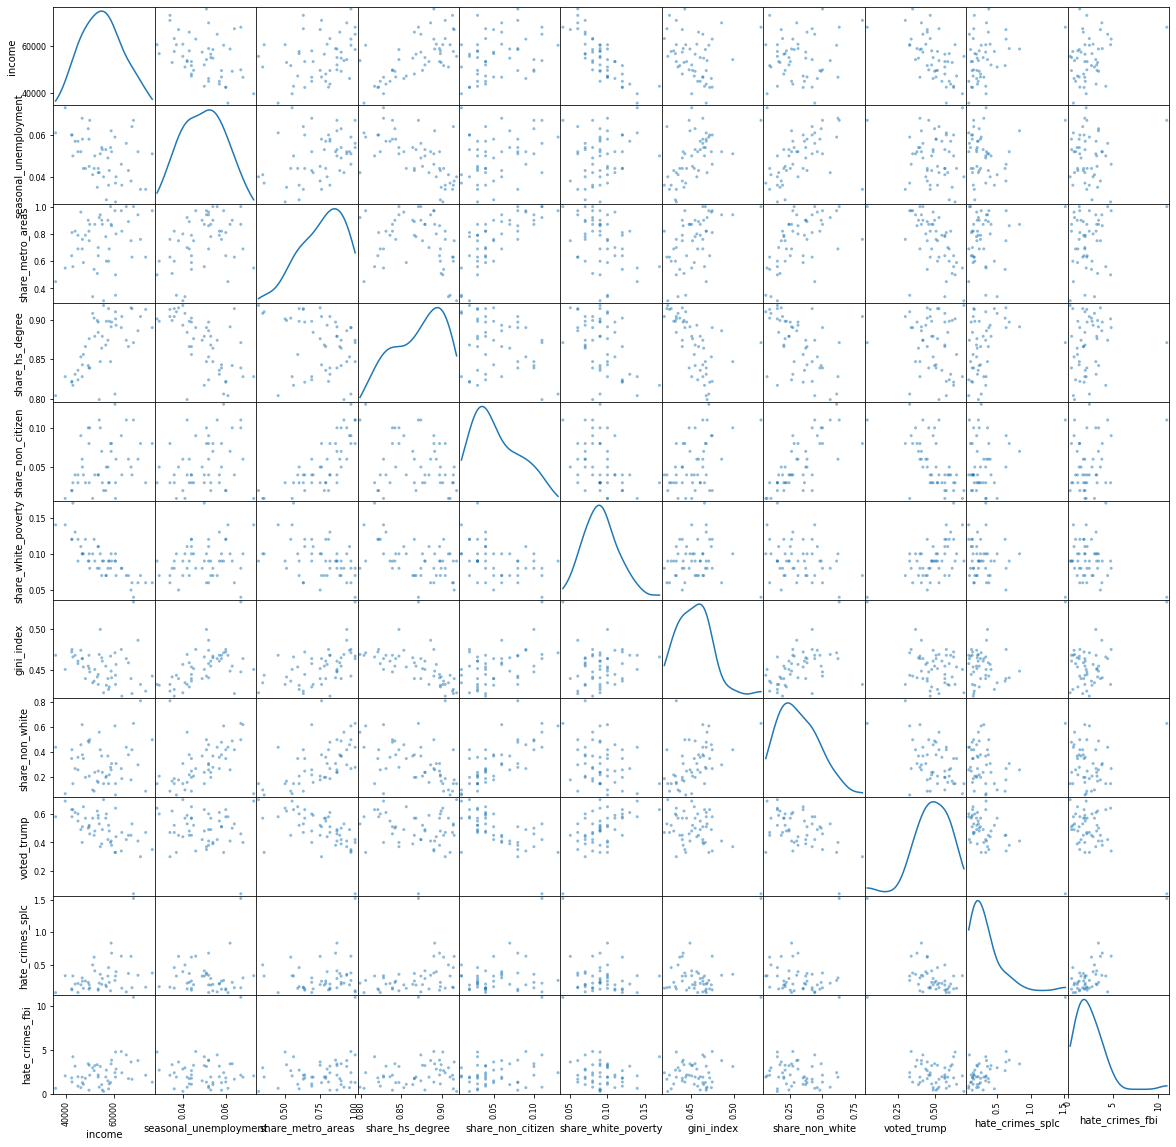

In [19]:
fig = pd.plotting.scatter_matrix(df, figsize=(20,20), diagonal='kde')

In [71]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
regressor = SVR()

In [72]:
imputed_df = df.fillna(df.median())

In [73]:
X = imputed_df.drop(['state', 'hate_crimes_splc', 'hate_crimes_fbi'], axis=1)

y =  imputed_df['hate_crimes_splc']
S

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)Vregressorit(d X=X,y=_trainy_train

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [74]:
regressor.predict(X_test) / y_test

11    1.801518
30    4.625583
4     1.266417
27    1.848829
0     1.552726
23    0.602207
45    1.004925
29    2.788092
34    1.440884
41    1.172636
42    1.015993
50    1.262390
15    0.665386
26    0.506249
44    2.543879
20    1.188338
31    0.749060
Name: hate_crimes_splc, dtype: float64